## Esempio Housing price prediction

### Abbiamo il seguente dataset
| Size (1000 sqmeters)     | Price (1000s of euros) |
| -------------------| ------------------------ |
| 1.0               | 100                      |
| 2.0               | 200                      |

In [18]:
%pip install -q numpy

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
x_train = np.array([1.0, 2.0])
y_train = np.array([100.0, 200.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [100. 200.]


#### Quanti samples abbiamo?

In [20]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number di samples: {m}")

x_train.shape: (2,)
Number di samples: 2


### Esempio di training (`x_i, y_i`)

Usiamo $(x_{i}, y_{i})$ per denotare il $i^{esimo}$ esempio di training. 

$x_{0} = 1.0 $

$x_{1} = 2.0 $

$y_{0} = 100 $

$y_{1} = 200 $

### Plotting

In [21]:
%pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


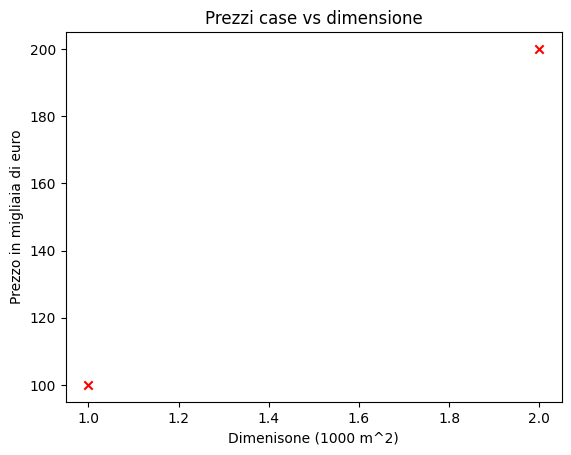

In [22]:
import matplotlib.pyplot as plt
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Prezzi case vs dimensione")
# Set the y-axis label
plt.ylabel('Prezzo in migliaia di euro')
# Set the x-axis label
plt.xlabel('Dimenisone (1000 m^2)')
plt.show()

La formula per una regressione lineare a singola variabile è la seguente. Dove $w_0$ e $w_1$ sono rispettivamente l'intercetta e coefficiente angolare della retta.
$$ y{(x,w)}= w_0 + w_1x_{1}\tag{1}$$
Proviamo a fittare i punti con una retta:

In [23]:
w1 = 100
w0 = 100
print(f"w1: {w1}")
print(f"w0: {w0}")

w1: 100
w0: 100


In [24]:
def compute_model_output(x, w0, w1):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w0,w1 (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    y = np.zeros(m)
    for i in range(m):
        y[i] = w0 + w1 * x[i]
        
    return y

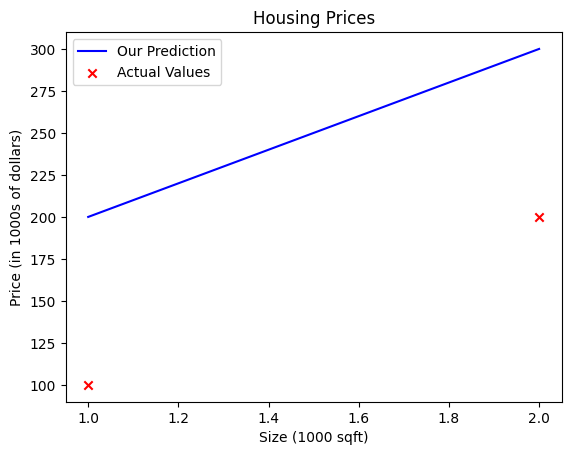

In [25]:
tmp_y = compute_model_output(x_train, w0, w1)

# Plot our model prediction
plt.plot(x_train, tmp_y, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Equazione generica passante per due punti

L'equazione generica di una retta passante per due punti $(x_1, y_1)$ e $(x_2, y_2)$ può essere rappresentata usando la formula:

$$\frac{x-x_1}{x_2-x_1} = \frac{y-y_1}{y_2-y_1}$$

## Risoluzione con i punti (1,100) e (2,200)

Inserisco i valori dei punti corretti:
- Punto 1: $(x_1, y_1) = (1, 100)$
- Punto 2: $(x_2, y_2) = (2, 200)$

Sostituisco nella formula:

$$\frac{x-1}{2-1} = \frac{y-100}{200-100}$$

Semplifico:

$$\frac{x-1}{1} = \frac{y-100}{100}$$

$$x-1 = \frac{y-100}{100}$$

Moltiplico entrambi i lati per 100:

$$100(x-1) = y-100$$

$$100x-100 = y-100$$

$$100x = y$$

### Forma y = wx + b

Per trovare i parametri $w$ e $b$ della forma $y = wx + b$:

Dall'equazione $100x = y$, possiamo riscrivere:

$$y = 100x$$

Quindi, confrontando con $y = wx + b$:
- $w_0 = 0$
- $w_1 = 100$



In [26]:
w_0 = 0
w_1 = 100
print(f"w_0: {w_0}")
print(f"w_1: {w_1}")

w_0: 0
w_1: 100


[100. 200.]


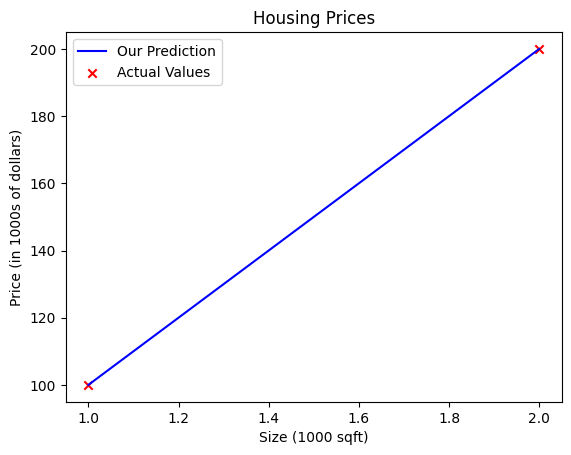

In [27]:
tmp_y = compute_model_output(x_train, w_0, w_1)
print(tmp_y)# Plot our model prediction
plt.plot(x_train, tmp_y, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Funzione Errore

## Definizione del problema

Si desidera un modello che possa prevedere i prezzi delle abitazioni in base alla dimensione della casa.  
Utilizziamo due punti dati: una casa di 100 metri quadrati venduta per €300.000 e una casa di 200 metri quadrati venduta per €500.000.


| Dimensione (100m²)    | Prezzo (migliaia di €) |
| -------------------| ------------------------ |
| 1                | 300                      |
| 2                | 500                      |

In [28]:
import numpy as np
x_train = np.array([1.0, 2.0]) 
y_train = np.array([300.0, 500.0])

## Calcolo dell'errore
L'equazione dell'errore è:
$$E(y,w) = \frac{1}{2} \sum\limits_{n = 0}^{N-1} (y(x_n,w) - t_n)^2 \tag{1}$$ 

dove 
$$y(x_n,w) = w_1x_n + w_0 \tag{2}$$

- $y(x_n,w)$ è la nostra previsione per l'esempio $n$ utilizzando i parametri $w$.  
- $(y(x_n,w) - t_n)^2$ è la differenza al quadrato tra il valore target e la previsione.   


In [29]:
def compute_cost(x, y, w1, w0): 
   """
   Calcola la funzione di costo per la regressione lineare.
   
   Argomenti:
     x (ndarray (m,)): Dati di input, m esempi 
     y (ndarray (m,)): Valori target (output desiderato)
     w1, w0 (scalari)   : Parametri del modello  
   Restituisce:
       total_cost (float): Il costo dell'uso di w come parametri della regressione lineare
                          per adattare i punti dati in x e y.
   """
   # Numero di esempi di addestramento
   m = x.shape[0] 
   
   cost_sum = 0  # Inizializzazione della somma dei costi
   for n in range(m): 
       y_pred = w1 * x[n] + w0  # Calcola il valore predetto dal modello per l'n-esimo esempio
       cost = (y_pred - y[n]) ** 2  # Calcola l'errore quadratico
       cost_sum = cost_sum + cost  # Somma l'errore quadratico totale

   # Calcolo finale del costo medio normalizzato
   total_cost = (1 /2) * cost_sum  
   
   
   return total_cost

### Obiettivo: 
Trovare la funzione $y(x,w) = w_1x + w_0$, con parametri $w$, che possa prevedere accuratamente i valori delle case dato un input $x$.

Il costo o errore è una misura di quanto il modello sia accurato sui dati di addestramento.

L'equazione dell'errore mostra che se $w_1$ e $w_0$ possono essere selezionati in modo che le previsioni $y(x_n,w)$ corrispondano ai dati target $t_n$, il termine $(y(x_n,w) - t_n)^2$ sarà zero e il costo sarà minimizzato

In [30]:
%pip install -q matplotlib
%pip install -q ipywidgets
%pip install -q ipympl


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Se il grafico non si vede -- Ctrl+shift+P, Reload window

In [31]:
import sys
sys.path.append('.')
from functions.utils import (
    create_interactive_widget,
)

create_interactive_widget(
    x_train, y_train, compute_cost,
    w_initial=60,   # valore iniziale di w
    b_initial=40,   # valore iniziale di b
    w_min=-200,        # valore minimo di w
    w_max=200,      # valore massimo di w
    w_step=0.05,     # incremento di w
    b_min=-200,        # valore minimo di b
    b_max=200,      # valore massimo di b
    b_step=0.05      # incremento di b
)

interactive(children=(FloatSlider(value=60.0, description='w1:', max=200.0, min=-200.0, step=0.05), FloatSlide…

### Dataset più grande

In [32]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

Output()

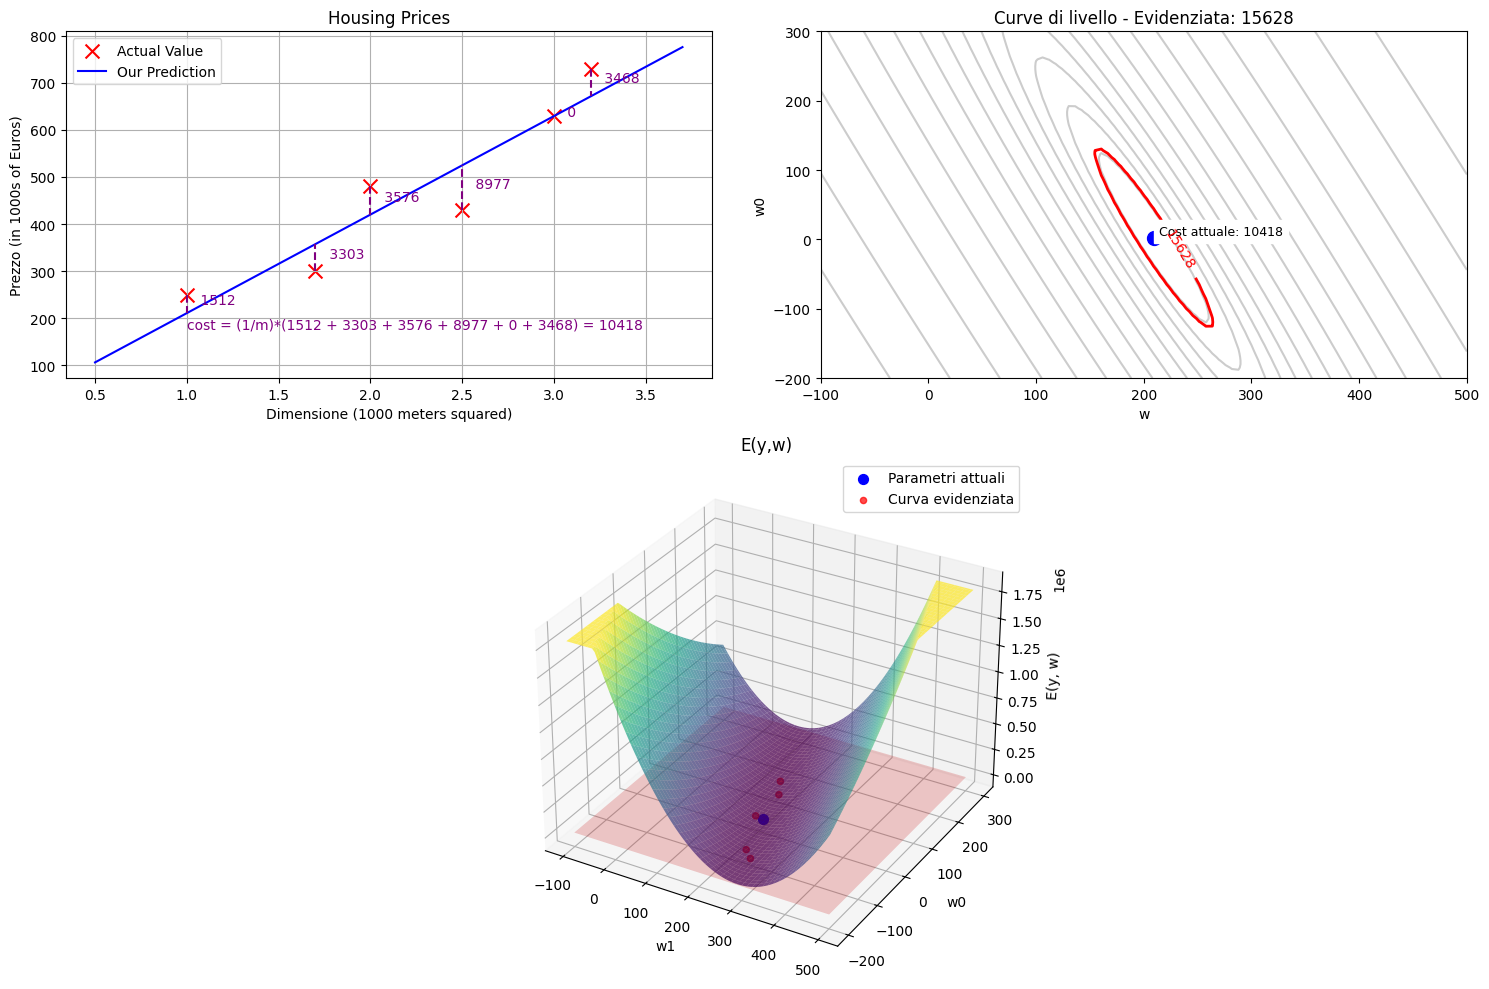

In [ ]:
from functions.utils import (
    create_cost_level_visualizer
)
create_cost_level_visualizer(x_train, y_train, compute_cost)


## Discesa del gradiente

# Derivazione del Gradiente in Regressione Lineare

## 1. Riepilogo sulla funzione di costo

In regressione lineare, la nostra funzione di previsione è:

$$y(x_n,w) = w_1x_n + w_0$$

Per misurare l'accuratezza del nostro modello, utilizziamo la funzione costo dell'errore quadratico medio (MSE):

$$E(y,w) = \frac{1}{2m} \sum\limits_{n = 0}^{N-1} (y(x_n,w) - t_n)^2$$

Dove:
- $m$ è il numero di esempi di addestramento
- $x_n$ è la caratteristica dell'esempio $n$
- $t_n$ è il valore target dell'esempio $n$
- Il fattore $\frac{1}{2}$ è incluso per convenienza matematica

## 2. Obiettivo dell'Algoritmo di Discesa del Gradiente

L'algoritmo di discesa del gradiente cerca di minimizzare $E(y,w)$ aggiornando iterativamente i parametri $w_1$ e $w_0$:

$$w_1 := w_1 - \alpha \frac{\partial E(y,w)}{\partial w_1}$$
$$w_0 := w_0 - \alpha \frac{\partial E(y,w)}{\partial w_0}$$

Dove $\alpha$ è il tasso di apprendimento. Per implementare questo algoritmo, dobbiamo calcolare le derivate parziali $\frac{\partial E(y,w)}{\partial w_1}$ e $\frac{\partial E(y,w)}{\partial w_0}$.

## 3. Calcolo del Gradiente

### Derivata rispetto a $w_1$

Iniziamo calcolando $\frac{\partial E(y,w)}{\partial w_1}$:

$$\frac{\partial E(y,w)}{\partial w_1} = \frac{\partial}{\partial w_1}\left[\frac{1}{2m} \sum\limits_{n = 0}^{m-1} (y(x_n,w) - t_n)^2\right]$$

Possiamo scambiare l'ordine della derivata e della sommatoria:

$$\frac{\partial E(y,w)}{\partial w_1} = \frac{1}{2m} \sum\limits_{n = 0}^{m-1} \frac{\partial}{\partial w_1}\left[(y(x_n,w) - t_n)^2\right]$$

Per calcolare $\frac{\partial}{\partial w_1}\left[(y(x_n,w) - t_n)^2\right]$, calcoliamo la derivata di una funzione composta (chain rule).

Sia $u = y(x_n,w) - t_n$, allora stiamo cercando $\frac{\partial u^2}{\partial w_1}$.

Per la regola della catena:
$$\frac{\partial u^2}{\partial w_1} = \frac{\partial u^2}{\partial u} \cdot \frac{\partial u}{\partial w_1}$$

Calcoliamo ogni parte:
- $\frac{\partial u^2}{\partial u} = 2u$
- $\frac{\partial u}{\partial w_1} = \frac{\partial}{\partial w_1}(y(x_n,w) - t_n) = \frac{\partial}{\partial w_1}(w_1x_n + w_0 - t_n) = x_n$

Quindi:
$$\frac{\partial}{\partial w_1}\left[(y(x_n,w) - t_n)^2\right] = 2(y(x_n,w) - t_n) \cdot x_n$$

Sostituendo nella nostra equazione principale:

$$\frac{\partial E(y,w)}{\partial w_1} = \frac{1}{2m} \sum\limits_{n = 0}^{m-1} 2(y(x_n,w) - t_n) \cdot x_n$$

Semplificando:

$$\frac{\partial E(y,w)}{\partial w_1} = \frac{1}{m} \sum\limits_{n = 0}^{m-1} (y(x_n,w) - t_n) \cdot x_n$$

Sostituendo $y(x_n,w) = w_1x_n + w_0$:

$$\frac{\partial E(y,w)}{\partial w_1} = \frac{1}{m} \sum\limits_{n = 0}^{m-1} (w_1x_n + w_0 - t_n) \cdot x_n$$

### Derivata rispetto a $w_0$

In modo simile, calcoliamo $\frac{\partial E(y,w)}{\partial w_0}$:

$$\frac{\partial E(y,w)}{\partial w_0} = \frac{\partial}{\partial w_0}\left[\frac{1}{2m} \sum\limits_{n = 0}^{m-1} (y(x_n,w) - t_n)^2\right]$$

$$\frac{\partial E(y,w)}{\partial w_0} = \frac{1}{2m} \sum\limits_{n = 0}^{m-1} \frac{\partial}{\partial w_0}\left[(y(x_n,w) - t_n)^2\right]$$

Utilizzando la regola della catena:

$$\frac{\partial}{\partial w_0}\left[(y(x_n,w) - t_n)^2\right] = 2(y(x_n,w) - t_n) \cdot \frac{\partial}{\partial w_0}(y(x_n,w) - t_n)$$

Dove $\frac{\partial}{\partial w_0}(y(x_n,w) - t_n) = \frac{\partial}{\partial w_0}(w_1x_n + w_0 - t_n) = 1$

Quindi:
$$\frac{\partial}{\partial w_0}\left[(y(x_n,w) - t_n)^2\right] = 2(y(x_n,w) - t_n)$$

Sostituendo nella nostra equazione principale:

$$\frac{\partial E(y,w)}{\partial w_0} = \frac{1}{2m} \sum\limits_{n = 0}^{m-1} 2(y(x_n,w) - t_n)$$

Semplificando:

$$\frac{\partial E(y,w)}{\partial w_0} = \frac{1}{m} \sum\limits_{n = 0}^{m-1} (y(x_n,w) - t_n)$$

Sostituendo $y(x_n,w) = w_1x_n + w_0$:

$$\frac{\partial E(y,w)}{\partial w_0} = \frac{1}{m} \sum\limits_{n = 0}^{m-1} (w_1x_n + w_0 - t_n)$$

## 4. Interpretazione del Gradiente

Le formule che abbiamo ottenuto hanno un'interpretazione intuitiva:

- $\frac{\partial E(y,w)}{\partial w_1} = \frac{1}{m} \sum\limits_{n = 0}^{m-1} (y(x_n,w) - t_n) \cdot x_n$: La derivata rispetto a $w_1$ è la media degli errori di previsione, ciascuno moltiplicato per la rispettiva caratteristica.

- $\frac{\partial E(y,w)}{\partial w_0} = \frac{1}{m} \sum\limits_{n = 0}^{m-1} (y(x_n,w) - t_n)$: La derivata rispetto a $w_0$ è semplicemente la media degli errori di previsione.

## 5. L'Importanza del Fattore $\frac{1}{2}$

Ora è chiaro perché abbiamo incluso il fattore $\frac{1}{2}$ nella definizione della funzione costo: si semplifica con il fattore $2$ che emerge dalla derivata del termine quadratico, producendo formule più eleganti per il gradiente.

## 6. Algoritmo di Discesa del Gradiente Completo

Combinando tutti questi elementi, l'algoritmo di discesa del gradiente diventa:

Ripeti fino alla convergenza {
  $$w_1 := w_1 - \alpha  \sum\limits_{n = 0}^{N-1} (w_1x_n + w_0 - t_n) \cdot x_n$$
  $$w_0 := w_0 - \alpha  \sum\limits_{n = 0}^{N-1} (w_1x_n + w_0 - t_n)$$
}

dove le due operazioni vengono eseguite simultaneamente ad ogni iterazione.

### Implementiamolo:
Ci servono 3 funzioni
- Calcolo costo
- Calcolo Gradiente
- Calcolo Discesa

In [34]:
def compute_gradient(x, y, w1, w0): 
   """
   Calcola il gradiente per la regressione lineare 
   Args:
     x (ndarray (m,)): Dati, m esempi 
     y (ndarray (m,)): Valori target
     w1 (scalar)     : Parametro del modello per il coefficiente della variabile
     w0 (scalar)     : Parametro del modello per l'intercetta  
   Returns
     dj_dw1 (scalar): Il gradiente del costo rispetto al parametro w1
     dj_dw0 (scalar): Il gradiente del costo rispetto al parametro w0     
   """
   
   # Numero di esempi di training
   m = x.shape[0]    
   dj_dw1 = 0
   dj_dw0 = 0
   
   for n in range(m):  
       # Calcolo dell'output del modello per l'esempio n-esimo
       y_pred = w1 * x[n] + w0 
       
       # Calcolo del contributo dell'esempio n-esimo al gradiente rispetto a w1
       dj_dw1_i = (y_pred - y[n]) * x[n] 
       
       # Calcolo del contributo dell'esempio n-esimo al gradiente rispetto a w0
       dj_dw0_i = y_pred - y[n] 
       
       # Accumulo dei contributi
       dj_dw0 += dj_dw0_i
       dj_dw1 += dj_dw1_i 
   
   # Calcolo della media dei gradienti su tutti gli esempi
   dj_dw1 = dj_dw1 / m 
   dj_dw0 = dj_dw0 / m 
       
   return dj_dw1, dj_dw0

In [35]:
def compute_cost(x, y, w1, w0): 
   """
   Calcola la funzione di costo per la regressione lineare.
   
   Argomenti:
     x (ndarray (m,)): Dati di input, m esempi 
     y (ndarray (m,)): Valori target (output desiderato)
     w1, w0 (scalari)   : Parametri del modello  
   Restituisce:
       total_cost (float): Il costo dell'uso di w come parametri della regressione lineare
                          per adattare i punti dati in x e y.
   """
   # Numero di esempi di addestramento
   m = x.shape[0] 
   
   cost_sum = 0  # Inizializzazione della somma dei costi
   for n in range(m): 
       y_pred = w1 * x[n] + w0  # Calcola il valore predetto dal modello per l'n-esimo esempio
       cost = (y_pred - y[n]) ** 2  # Calcola l'errore quadratico
       cost_sum = cost_sum + cost  # Somma l'errore quadratico totale

   # Calcolo finale del costo medio normalizzato
   total_cost = (1 / (2)) * cost_sum  
   
   
   return total_cost

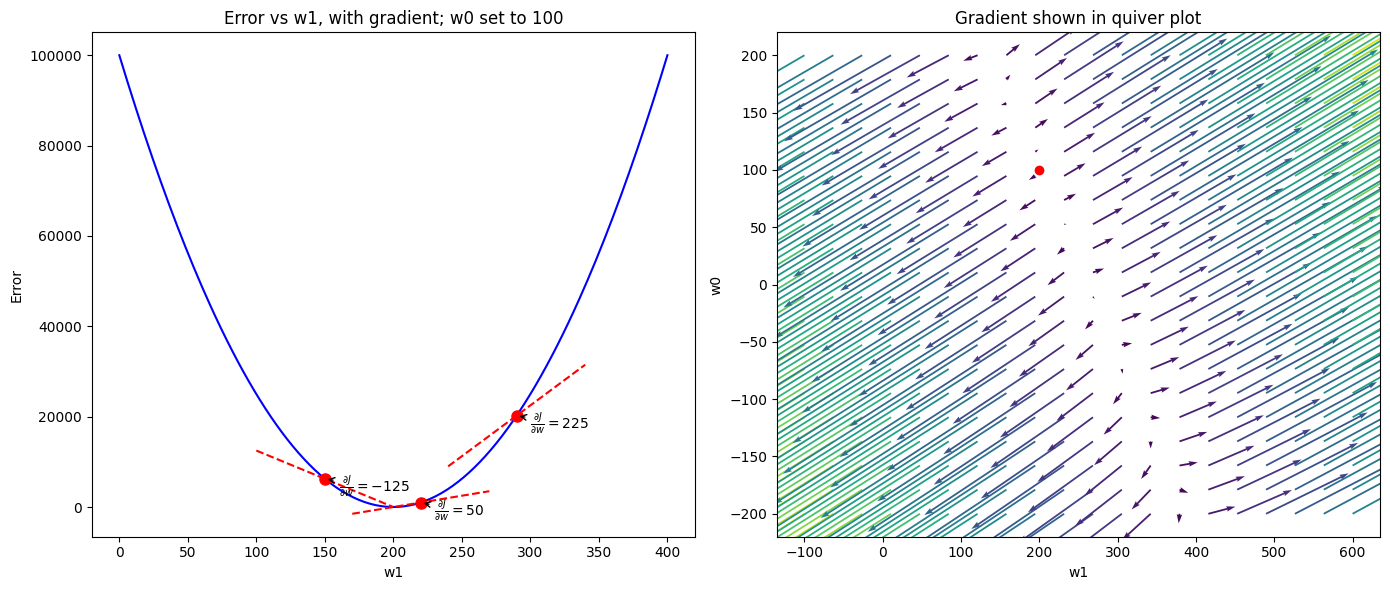

In [36]:
from functions.utils import plt_gradients
x_train = np.array([1.0, 2.0]) 
y_train = np.array([300.0, 500.0])
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

# Visualizzazione dei gradienti nella regressione lineare

Nel grafico sopra, il plot a sinistra mostra $\frac{\partial E(y,w)}{\partial w_1}$ o la pendenza della curva di costo rispetto a $w_1$ in tre punti. Sul lato destro del grafico, la derivata è positiva, mentre sul lato sinistro è negativa. A causa della "forma a conca", le derivate guideranno sempre la discesa del gradiente verso il punto più basso dove il gradiente è zero.

Il grafico a sinistra ha $w_0=100$ fisso. La discesa del gradiente utilizzerà sia $\frac{\partial E(y,w)}{\partial w_1}$ che $\frac{\partial E(y,w)}{\partial w_0}$ per aggiornare i parametri. Il "quiver plot" a destra fornisce un modo per visualizzare il gradiente di entrambi i parametri. Le dimensioni delle frecce riflettono l'ampiezza del gradiente in quel punto. La direzione e l'inclinazione della freccia riflettono il rapporto tra $\frac{\partial E(y,w)}{\partial w_1}$ e $\frac{\partial E(y,w)}{\partial w_0}$ in quel punto.

Da notare che il gradiente punta *lontano* dal minimo. Rivedi l'equazione (3) sopra. Il gradiente scalato viene *sottratto* dal valore attuale di $w_1$ o $w_0$. Questo sposta il parametro in una direzione che ridurrà il costo.

In [41]:
import math

def gradient_descent(x, y, w1_in, w0_in, alpha, num_iters, cost_function, gradient_function): 
   """
   Esegue la discesa del gradiente per trovare i valori ottimali di w1,w0. Aggiorna w1,w0 
   facendo num_iters passi di gradiente con tasso di apprendimento alpha
   
   Args:
     x (ndarray (m,))  : Dati, m esempi 
     y (ndarray (m,))  : Valori target
     w1_in,w0_in (scalar): Valori iniziali dei parametri del modello  
     alpha (float):     Tasso di apprendimento
     num_iters (int):   Numero di iterazioni per eseguire la discesa del gradiente
     cost_function:     Funzione da chiamare per calcolare il costo
     gradient_function: Funzione da chiamare per calcolare il gradiente
     
   Returns:
     w1 (scalar): Valore aggiornato del parametro dopo aver eseguito la discesa del gradiente
     w0 (scalar): Valore aggiornato del parametro dopo aver eseguito la discesa del gradiente
     J_history (List): Storico dei valori di costo
     p_history (list): Storico dei parametri [w1,w0] 
   """
   
   # Un array per memorizzare il costo J e i valori di w ad ogni iterazione, principalmente per la visualizzazione grafica successiva
   J_history = []
   p_history = []
   w0 = w0_in
   w1 = w1_in
   
   for i in range(num_iters):
       # Calcola il gradiente e aggiorna i parametri usando gradient_function
       dj_dw1, dj_dw0 = gradient_function(x, y, w1, w0)     
       # Aggiorna i parametri usando l'equazione (3) sopra
       w0 = w0 - alpha * dj_dw0                            
       w1 = w1 - alpha * dj_dw1                            
       # Salva il costo J ad ogni iterazione
       if i<100000:      # previene l'esaurimento delle risorse 
           J_history.append(cost_function(x, y, w1, w0))
           p_history.append([w1,w0])
       # Stampa il costo a intervalli 10 volte o tante iterazioni se < 10
       if i% math.ceil(num_iters/10) == 0:
           print(f"Iterazione {i:4}: Costo {J_history[-1]:0.2e} ",
                 f"dj_dw1: {dj_dw1: 0.3e}, dj_dw0: {dj_dw0: 0.3e}  ",
                 f"w1: {w1: 0.3e}, w0:{w0: 0.5e}")

   return w1, w0, J_history, p_history # restituisce w e lo storico di J,w per la visualizzazione grafica

In [47]:
w1_init = 100
w0_init = 0
#Settings della discesa
iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, E_hist, p_hist = gradient_descent(x_train ,y_train, w1_init, w0_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w1,w0) minimo: ({w_final:8.4f},{b_final:8.4f})")

Iterazione    0: Costo 6.06e+04  dj_dw1: -4.000e+02, dj_dw0: -2.500e+02   w1:  1.040e+02, w0: 2.50000e+00
Iterazione 1000: Costo 1.79e+01  dj_dw1:  6.007e-01, dj_dw0: -9.719e-01   w1:  2.082e+02, w0: 8.66868e+01
Iterazione 2000: Costo 4.15e+00  dj_dw1:  2.895e-01, dj_dw0: -4.685e-01   w1:  2.040e+02, w0: 9.35827e+01
Iterazione 3000: Costo 9.65e-01  dj_dw1:  1.396e-01, dj_dw0: -2.258e-01   w1:  2.019e+02, w0: 9.69067e+01
Iterazione 4000: Costo 2.24e-01  dj_dw1:  6.727e-02, dj_dw0: -1.089e-01   w1:  2.009e+02, w0: 9.85089e+01
Iterazione 5000: Costo 5.21e-02  dj_dw1:  3.243e-02, dj_dw0: -5.247e-02   w1:  2.004e+02, w0: 9.92813e+01
Iterazione 6000: Costo 1.21e-02  dj_dw1:  1.563e-02, dj_dw0: -2.529e-02   w1:  2.002e+02, w0: 9.96536e+01
Iterazione 7000: Costo 2.81e-03  dj_dw1:  7.535e-03, dj_dw0: -1.219e-02   w1:  2.001e+02, w0: 9.98330e+01
Iterazione 8000: Costo 6.53e-04  dj_dw1:  3.632e-03, dj_dw0: -5.876e-03   w1:  2.000e+02, w0: 9.99195e+01
Iterazione 9000: Costo 1.52e-04  dj_dw1:  1.75

La funzione di costo è passata da un valore alto (7.93e+04) a un valore molto basso (2.90e-05), indicando che il modello si adatta molto bene ai dati.

I valori finali delle derivate sono molto piccoli, indicando che siamo in un punto stazionario (idealmente il minimo globale della funzione di costo).

I parametri finali suggeriscono che la retta di regressione ottimale ha equazione approssimativa y = 199.9929x + 100.0116.

### Costo contro Iterazioni del gradient descent 


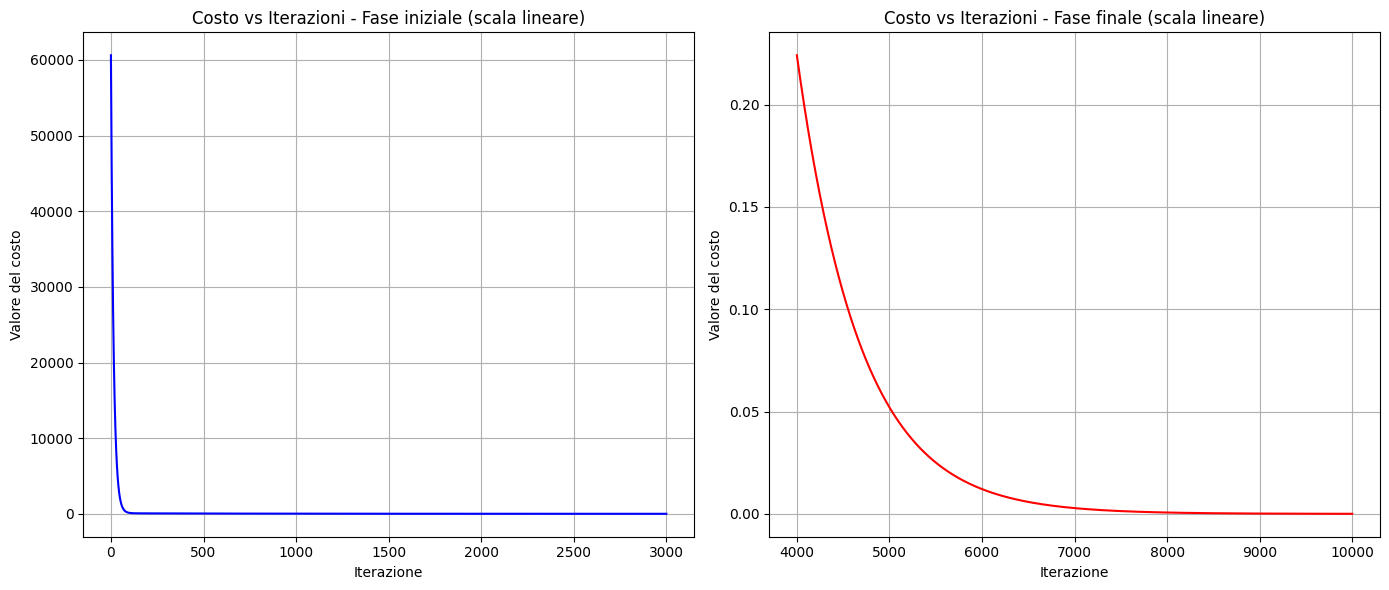

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assumiamo che E_hist sia un array di 10000 elementi
# e creiamo un array di iterazioni corrispondente
E_hist = np.array(E_hist)  # Questo sarà il tuo vero array E_hist
iterations = np.arange(len(E_hist))

# Definizione dei range per le iterazioni iniziali (30%) e finali (60%)
initial_end = int(len(iterations) * 0.3)
final_start = int(len(iterations) * 0.4)  # inizia dal 40% per avere l'ultimo 60%


# Versione alternativa: zoom sui primi e ultimi valori con scala lineare
plt.figure(figsize=(14, 6))

# Plot iterazioni iniziali (primi 30%)
plt.subplot(1, 2, 1)
plt.plot(iterations[:initial_end], E_hist[:initial_end], 'b-')
plt.title('Costo vs Iterazioni - Fase iniziale (scala lineare)')
plt.xlabel('Iterazione')
plt.ylabel('Valore del costo')
# Rimuovo la scala log per vedere il comportamento lineare
plt.grid(True)

# Plot iterazioni finali (ultimi 60%)
plt.subplot(1, 2, 2)
plt.plot(iterations[final_start:], E_hist[final_start:], 'r-')
plt.title('Costo vs Iterazioni - Fase finale (scala lineare)')
plt.xlabel('Iterazione')
plt.ylabel('Valore del costo')
# Rimuovo la scala log per vedere il comportamento lineare
plt.grid(True)

plt.tight_layout()
plt.show()

E' importante notare che il costo sta sempre scendendo, dalla sua parte iniziale alla fine.

Iterazione    0: Costo 5.16e+05  dj_dw1: -6.500e+02, dj_dw0: -4.000e+02   w1:  5.200e+02, w0: 3.20000e+02
Iterazione    1: Costo 1.56e+06  dj_dw1:  1.130e+03, dj_dw0:  7.000e+02   w1: -3.840e+02, w0:-2.40000e+02
Iterazione    2: Costo 4.74e+06  dj_dw1: -1.970e+03, dj_dw0: -1.216e+03   w1:  1.192e+03, w0: 7.32800e+02
Iterazione    3: Costo 1.44e+07  dj_dw1:  3.429e+03, dj_dw0:  2.121e+03   w1: -1.551e+03, w0:-9.63840e+02
Iterazione    4: Costo 4.36e+07  dj_dw1: -5.974e+03, dj_dw0: -3.691e+03   w1:  3.228e+03, w0: 1.98886e+03
Iterazione    5: Costo 1.32e+08  dj_dw1:  1.040e+04, dj_dw0:  6.431e+03   w1: -5.095e+03, w0:-3.15579e+03
Iterazione    6: Costo 4.02e+08  dj_dw1: -1.812e+04, dj_dw0: -1.120e+04   w1:  9.402e+03, w0: 5.80237e+03
Iterazione    7: Costo 1.22e+09  dj_dw1:  3.156e+04, dj_dw0:  1.950e+04   w1: -1.584e+04, w0:-9.80139e+03
Iterazione    8: Costo 3.70e+09  dj_dw1: -5.496e+04, dj_dw0: -3.397e+04   w1:  2.813e+04, w0: 1.73730e+04
Iterazione    9: Costo 1.12e+10  dj_dw1:  9.57

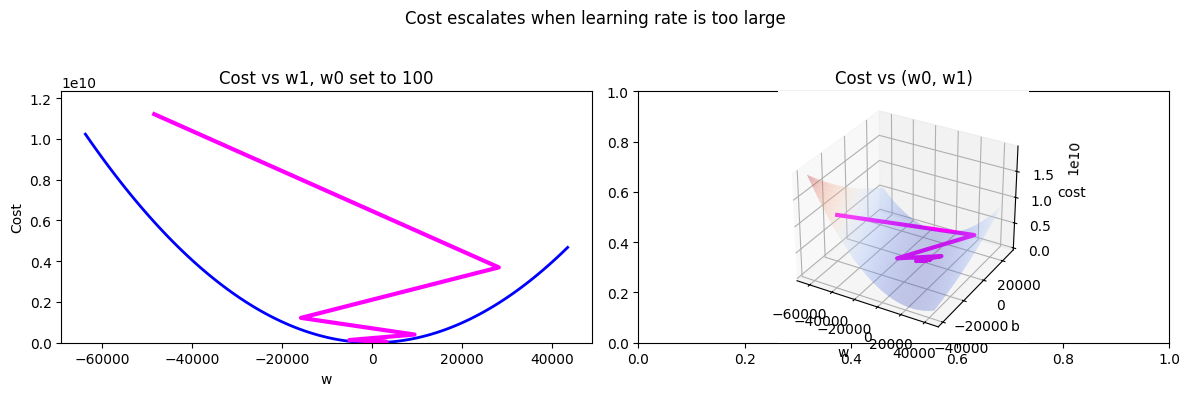

In [49]:
from functions.utils import plt_divergence

# Inizializza i parametri
w1_init = 0
w0_init = 0
# Imposta alpha (learning rate) a un valore grande
iterations = 10
tmp_alpha = 8.0e-1
# Esegui la discesa del gradiente
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w1_init, w0_init, tmp_alpha, 
                                                   iterations, compute_cost, compute_gradient)
# Visualizza i risultati
plt_divergence(p_hist, J_hist, x_train, y_train, compute_cost)
plt.show()
